In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Load the text files into a list of numpy arrays
non_seizure_signals = [] # Set C and Set D
seizure_signals = [] # Set E

data_path_setD = "/content/drive/MyDrive/Final yr project /Datasets/BONN/Set D/" #focal non-seizure
data_path_setC = "/content/drive/MyDrive/Final yr project /Datasets/BONN/set C/" #non-focal non-seizure
data_path_setE = "/content/drive/MyDrive/Final yr project /Datasets/BONN/Set E/" #seizure activity 

for i in range(1,101):
  if i<10:
    filename = 'F00{}.txt'.format(i) 
  elif i<100:
    filename = 'F0{}.txt'.format(i) 
  else:
    filename = 'F{}.txt'.format(i)
  signal = np.loadtxt(data_path_setD+filename)
  non_seizure_signals.append(signal)

for i in range(1,101):
  if i<10:
    filename = 'N00{}.TXT'.format(i)
  elif i<100:
    filename = 'N0{}.TXT'.format(i)
  else:
    filename = 'N{}.TXT'.format(i)
  signal = np.loadtxt(data_path_setC+filename)
  non_seizure_signals.append(signal)

for i in range(1,101):
  if i<10:
    filename = 'S00{}.txt'.format(i)
  elif i<100:
    filename = 'S0{}.txt'.format(i)
  else:
    filename = 'S{}.txt'.format(i)
  signal = np.loadtxt(data_path_setE+filename)
  seizure_signals.append(signal)


print(len(non_seizure_signals))
print(non_seizure_signals)

print(len(seizure_signals))
print(seizure_signals)


200
[array([34., 33., 28., ..., 39., 41.,  7.]), array([ 60.,  47.,  38., ..., 149., 126.,  42.]), array([  26.,   16.,   13., ...,  114.,   99., -130.]), array([-41., -42., -48., ..., -30., -23., -13.]), array([ 13.,   6.,  -1., ..., 161., 129.,   1.]), array([-15.,  -2.,   0., ..., -44., -42., -25.]), array([-24., -27., -23., ..., -57., -33., -52.]), array([ 23.,  17.,  10., ...,  41.,  39., -55.]), array([-263., -263., -261., ..., -316., -316., -254.]), array([ 59.,  52.,  51., ..., 109., 104., -57.]), array([  44.,   50.,   46., ...,   -3.,   -5., -112.]), array([-23., -31., -34., ...,  26.,  26.,  -9.]), array([ -6.,  -5., -10., ...,  43.,  35.,   3.]), array([ -7., -12., -14., ...,  -1., -10., -35.]), array([48., 54., 56., ...,  1.,  4., 28.]), array([-97., -91., -74., ..., -58., -58., -39.]), array([45., 42., 33., ...,  7., 11., 11.]), array([-42., -44., -38., ..., 104.,  88., 110.]), array([-72., -78., -90., ..., -43., -40., -22.]), array([ 21.,  16.,  14., ...,  73.,  68., -10

In [ ]:
# Augmenting the Set E 
time_shift_range = 100 # in ms
noise_level = 0.1
scaling_range = [0.9, 1.1]
augmented_signals = []

for signal in seizure_signals:
    # Time shifting
    time_shift = int(np.random.uniform(-time_shift_range, time_shift_range))
    if time_shift > 0:
        signal_augmented = np.concatenate((np.zeros((time_shift)), signal[:-time_shift]))
    else:
        signal_augmented = np.concatenate((signal[-time_shift:], np.zeros((-time_shift))))
    signal_augmented = signal_augmented[:4097]
    
    # Adding noise
    noise = np.random.normal(0, noise_level, size=signal_augmented.shape)
    signal_augmented = signal_augmented + noise
    
    # Scaling
    scaling_factor = np.random.uniform(scaling_range[0], scaling_range[1])
    signal_augmented = signal_augmented * scaling_factor
    
    augmented_signals.append(signal_augmented)

# Combine Augmented signals and Seizure signals with random shuffle
import random
augmented_seizure_signals = seizure_signals + augmented_signals
random.shuffle(augmented_seizure_signals)

print(len(augmented_seizure_signals))
print(augmented_seizure_signals)

200
[array([746., 692., 562., ..., 565., 677.,  11.]), array([-166., -204., -209., ...,  368.,  313.,   51.]), array([-8.37745878e+02, -5.79531094e+02, -1.93665092e+01, ...,
       -4.30284149e-02, -3.70482240e-02, -1.91713846e-01]), array([-71., -83., -95., ..., 100.,  94.,  59.]), array([-345., -166.,   91., ..., -472., -302.,  940.]), array([-635., -573., -525., ..., -370., -415., -593.]), array([ 7.77082387e-02,  1.82200782e+01,  2.55239101e+01, ...,
        4.88028425e-03,  3.82736009e-02, -2.52198841e-02]), array([  555.,   611.,   658., ...,   347.,   369., -1468.]), array([2.58091845e-02, 9.42622272e-03, 8.43889253e-02, ...,
       3.32093290e+01, 2.80768497e+01, 2.80142280e+01]), array([286., 251., 214., ..., 334., 188., 315.]), array([ -985.,  -594.,  -120., ..., -1073.,  -734., -1111.]), array([ 1.14201947e+02,  1.18055990e+02,  1.14227324e+02, ...,
        2.23125288e-02, -1.54805875e-01, -2.48707330e-02]), array([ 5.77242859e-02,  1.20751664e-01, -1.32660311e-02, ...,
    

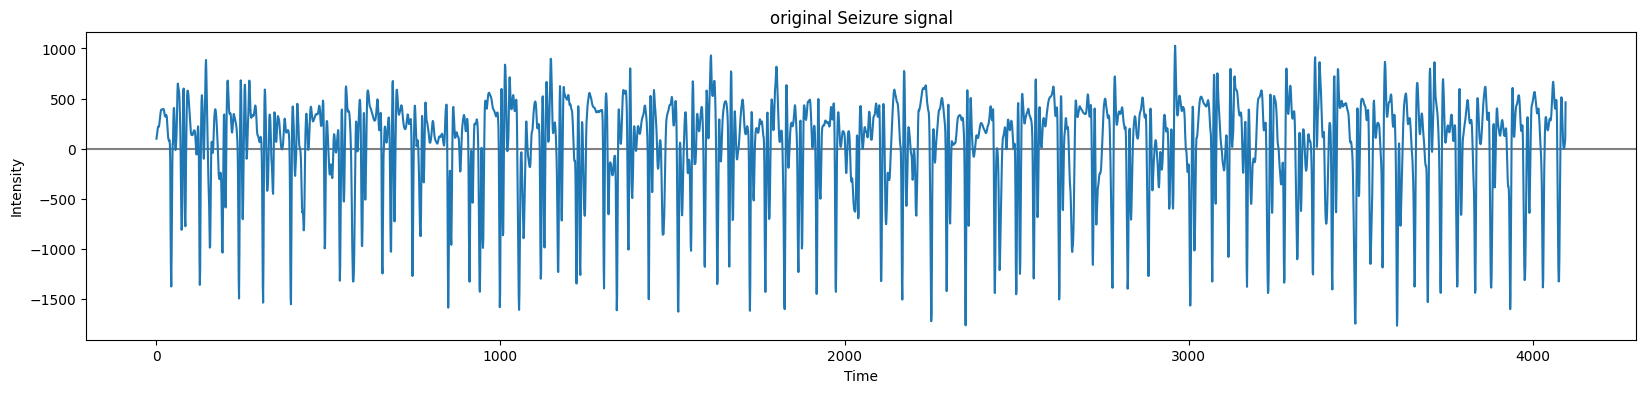

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the desired row as a pandas Series
row = seizure_signals[0] # Original Seizure signal

# Plot the line chart
fig = plt.figure(figsize=(20,4))
plt.axhline(0, color='grey')
plt.plot(row)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('original Seizure signal')
plt.show()

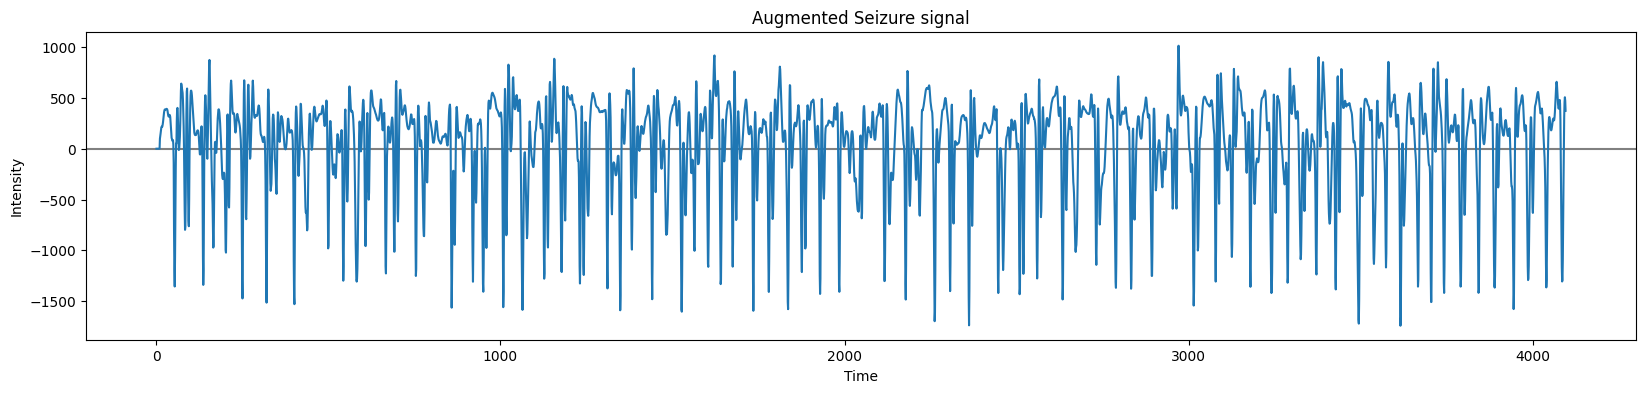

In [ ]:
# Extract the desired row as a pandas Series
row = augmented_signals[0] #augmented seizure signal

# Plot the line chart
fig = plt.figure(figsize=(20,4))
plt.axhline(0, color='grey')
plt.plot(row)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Augmented Seizure signal')
plt.show()

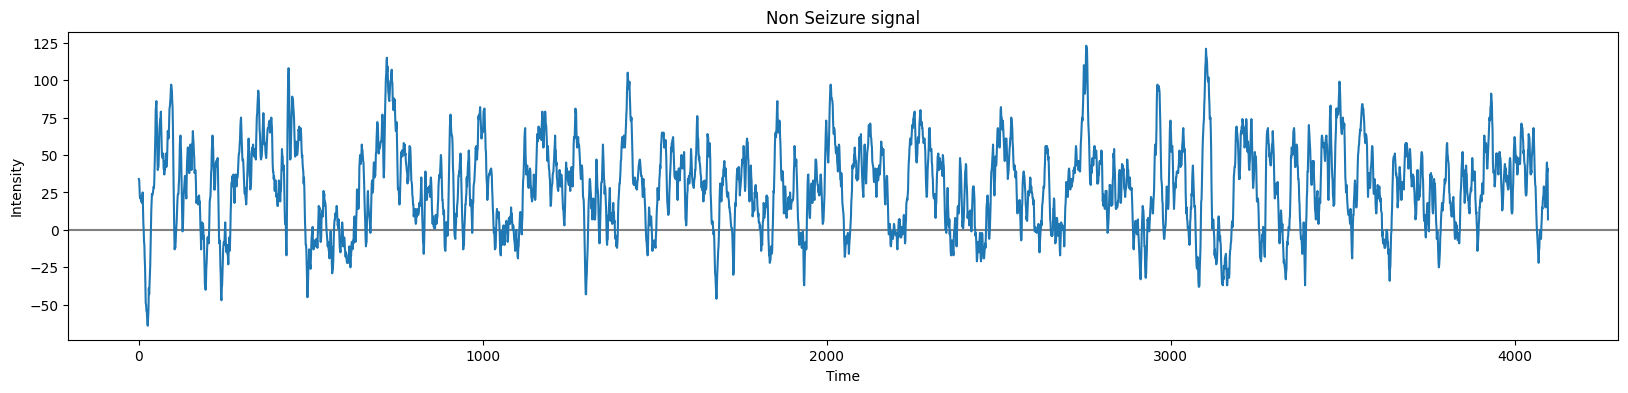

In [ ]:
# Extract the desired row as a pandas Series
row = non_seizure_signals[0] # Non seizure signal

# Plot the line chart
fig = plt.figure(figsize=(20,4))
plt.axhline(0, color='grey')
plt.plot(row)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Non Seizure signal')
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

# Define the filter parameters
lowcut = 0.5
highcut = 85
fs = 173.61
order = 5

# Compute the Nyquist frequency
nyquist = 0.5 * fs

# Compute the filter cutoff frequencies as fractions of the Nyquist frequency
low = lowcut / nyquist
high = highcut / nyquist

# Compute the filter coefficients
b, a = butter(order, [low, high], btype='band')

# Combining both seizure and non seizure signals
eeg_signals = non_seizure_signals + augmented_seizure_signals

# Apply the filter to the data
filtered_eeg_signals = filtfilt(b, a, eeg_signals)


In [ ]:
# converting into a numpy array
eeg_signals = np.array(filtered_eeg_signals) 
print(eeg_signals.shape)

# Create the labels
labels = np.zeros((eeg_signals.shape[0],), dtype=np.int32)
labels[:200] = 0 # set the first 200 rows to class 0 -> (non seizure signals)
labels[200:] = 1 # set the next 200 rows to class 1 -> (seizure signals)
print(labels.shape)

# Shuffle the data and labels
perm = np.random.permutation(len(eeg_signals))
data = eeg_signals[perm]
labels = labels[perm]

# saving the shuffled data and labels as numpy arrays to a file
np.save("data.npy", data)
np.save("labels.npy",labels)

print(data)
print(labels)

(400, 4097)
(400,)
[[  5.03462518   1.05600667  -4.11199294 ...  26.33195196  22.56472207
    4.41228984]
 [ 13.69583616   6.13920229  -1.34545816 ...  47.47381751  37.91548674
  -14.36423114]
 [  9.27220098   3.91005167  -1.17704046 ... -44.27688723 -26.4272985
  -11.76157978]
 ...
 [ 10.80916672  12.68797556  10.27989796 ...   7.74271354  12.08325013
   -2.11121398]
 [ -0.54618623  -5.78337303  -3.6724214  ... 306.82307192 303.32079845
   13.31313315]
 [  2.15357534   6.26622459   8.48932246 ...  54.54777223  57.75243636
   -1.17285025]]
[0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 1 1

In [ ]:
import numpy as np

# Load data
data = np.load('data.npy')

# Load labels
labels = np.load('labels.npy')

# Split the data into training and test sets (80:20)
train_size = int(0.8 * len(data))
train_data, train_labels = data[:train_size], labels[:train_size]
test_data, test_labels = data[train_size:], labels[train_size:]

# Reshape the data for use with LSTM, GRU, and Conv1D models
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))


**LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/10
10/10 [==============================] - 80s 8s/step - loss: 0.6100 - accuracy: 0.7094 - val_loss: 0.5205 - val_accuracy: 0.8375
Epoch 2/10
10/10 [==============================] - 71s 7s/step - loss: 0.4274 - accuracy: 0.8594 - val_loss: 0.3259 - val_accuracy: 0.9250
Epoch 3/10
10/10 [==============================] - 71s 7s/step - loss: 0.2549 - accuracy: 0.9219 - val_loss: 0.2004 - val_accuracy: 0.9375
Epoch 4/10
10/10 [==============================] - 72s 7s/step - loss: 0.2277 - accuracy: 0.9312 - val_loss: 0.2387 - val_accuracy: 0.9250
Epoch 5/10
10/10 [==============================] - 71s 7s/step - loss: 0.1624 - accuracy: 0.9500 - val_loss: 0.2393 - val_accuracy: 0.9375
Epoch 6/10
10/10 [==============================] - 72s 7s/step - loss: 0.1755 - accuracy: 0.9438 - val_loss: 0.2935 - val_accuracy: 0.9125
Epoch 7/10
10/10 [==============================] - 71s 7s/step - loss: 0.1967 - accuracy: 0.9312 - val_loss: 0.2183 - val_accuracy: 0.9375
Epoch 8/10
10/10 [==

In [ ]:
# Print the model summary
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 4097, 64)          16896     
                                                                 
 dropout_14 (Dropout)        (None, 4097, 64)          0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Predict the test labels
test_pred = model.predict(test_data)
test_pred = (test_pred > 0.5)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_pred))

3/3 [==============================] - 5s 2s/step - loss: 0.2047 - accuracy: 0.9500
Test loss: 0.2047155350446701
Test accuracy: 0.949999988079071
3/3 [==============================] - 4s 1s/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.90      0.95        41

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



3/3 [==============================] - 4s 1s/step


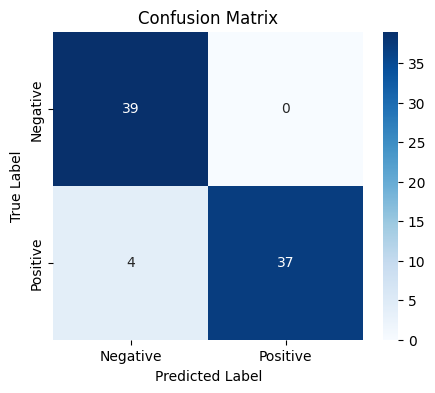

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
test_pred = model.predict(test_data)
test_pred = (test_pred > 0.5)

# Get the confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Define the class names
class_names = ['Negative', 'Positive']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

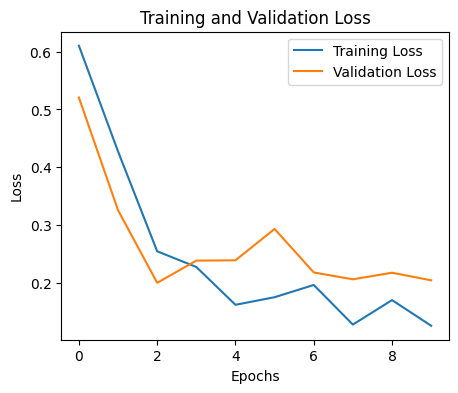

In [ ]:
# Get training and validation loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.figure(figsize=(5, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


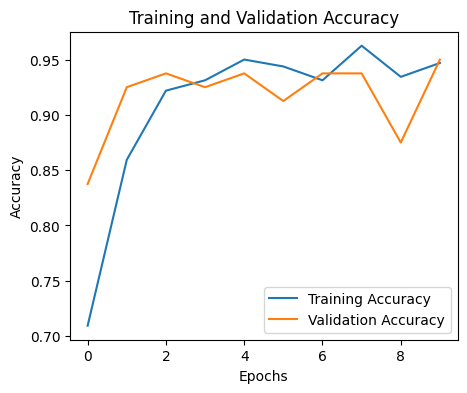

In [ ]:
# Get training and validation accuracy curves
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.figure(figsize=(5, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 4s 1s/step


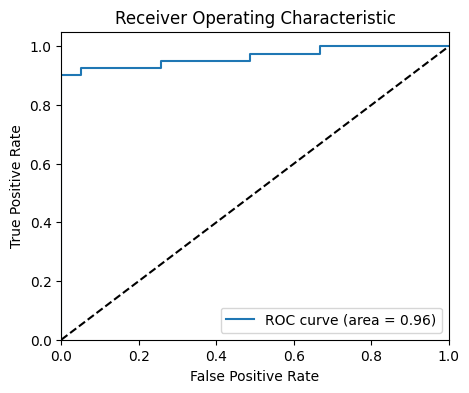

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for test data
y_pred_proba = model.predict(test_data)

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate area under curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the model
model.save("detection_model.h5")

---------

**GRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Build the model
model = Sequential()
model.add(GRU(64, input_shape=(train_data.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/10
10/10 [==============================] - 66s 6s/step - loss: 0.5835 - accuracy: 0.6438 - val_loss: 0.4953 - val_accuracy: 0.7875
Epoch 2/10
10/10 [==============================] - 61s 6s/step - loss: 0.4454 - accuracy: 0.8687 - val_loss: 0.3919 - val_accuracy: 0.9000
Epoch 3/10
10/10 [==============================] - 62s 6s/step - loss: 0.3878 - accuracy: 0.8906 - val_loss: 0.3263 - val_accuracy: 0.9125
Epoch 4/10
10/10 [==============================] - 61s 6s/step - loss: 0.2851 - accuracy: 0.9187 - val_loss: 0.2721 - val_accuracy: 0.9125
Epoch 5/10
10/10 [==============================] - 61s 6s/step - loss: 0.2300 - accuracy: 0.9219 - val_loss: 0.2382 - val_accuracy: 0.9250
Epoch 6/10
10/10 [==============================] - 61s 6s/step - loss: 0.1931 - accuracy: 0.9344 - val_loss: 0.2306 - val_accuracy: 0.9375
Epoch 7/10
10/10 [==============================] - 62s 6s/step - loss: 0.1808 - accuracy: 0.9406 - val_loss: 0.2323 - val_accuracy: 0.9375
Epoch 8/10
10/10 [==

In [ ]:
# Print the model summary
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 4097, 64)          12864     
                                                                 
 dropout_12 (Dropout)        (None, 4097, 64)          0         
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_data)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, np.round(predictions)))

3/3 - 3s - loss: 0.2187 - accuracy: 0.9375 - 3s/epoch - 924ms/step
Test loss: 0.21873319149017334
Test accuracy: 0.9375
3/3 [==============================] - 5s 1s/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.95      0.93      0.94        41

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



3/3 [==============================] - 3s 844ms/step


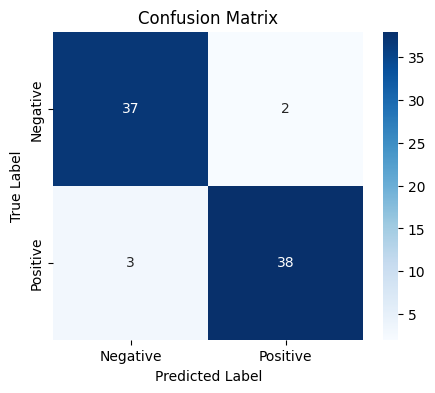

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
test_pred = model.predict(test_data)
test_pred = (test_pred > 0.5)

# Get the confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Define the class names
class_names = ['Negative', 'Positive']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

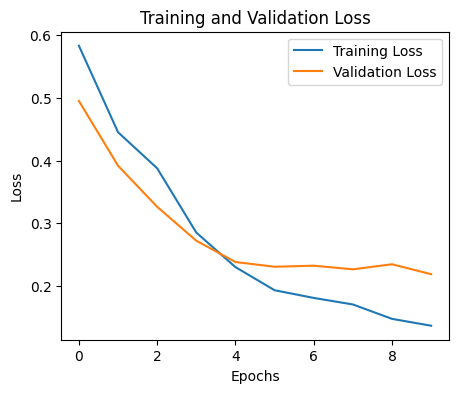

In [ ]:
# Get training and validation loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.figure(figsize=(5, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

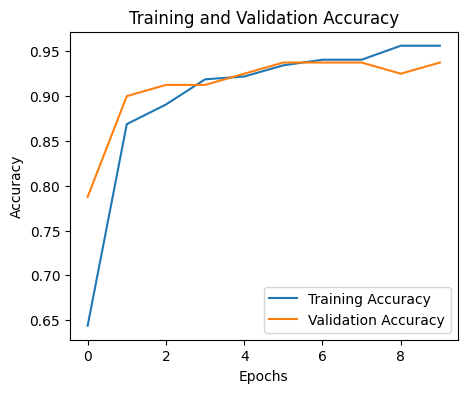

In [ ]:
# Get training and validation accuracy curves
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.figure(figsize=(5, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 3s 843ms/step


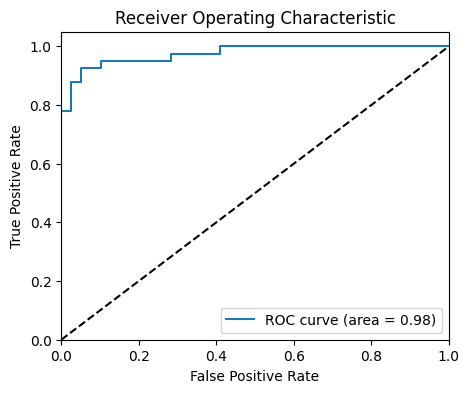

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for test data
y_pred_proba = model.predict(test_data)

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate area under curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---

**1D CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the input shape
input_shape = (train_data.shape[1], 1)

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
10/10 [==============================] - 2s 91ms/step - loss: 162.7612 - accuracy: 0.4938 - val_loss: 99.1743 - val_accuracy: 0.5375
Epoch 2/20
10/10 [==============================] - 1s 73ms/step - loss: 38.2193 - accuracy: 0.5781 - val_loss: 41.5100 - val_accuracy: 0.7375
Epoch 3/20
10/10 [==============================] - 1s 76ms/step - loss: 18.3668 - accuracy: 0.7312 - val_loss: 20.5409 - val_accuracy: 0.7625
Epoch 4/20
10/10 [==============================] - 1s 73ms/step - loss: 7.4239 - accuracy: 0.8406 - val_loss: 6.5996 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 1s 72ms/step - loss: 2.5396 - accuracy: 0.9125 - val_loss: 5.2636 - val_accuracy: 0.8625
Epoch 6/20
10/10 [==============================] - 1s 74ms/step - loss: 1.2233 - accuracy: 0.9469 - val_loss: 9.0896 - val_accuracy: 0.9125
Epoch 7/20
10/10 [==============================] - 1s 77ms/step - loss: 0.6031 - accuracy: 0.9531 - val_loss: 12.1369 - val_accuracy: 0.8875
Epoch

In [ ]:
# Print the model summary
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 4095, 32)          128       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2047, 32)         0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 65504)             0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65505     
                                                                 
Total params: 65,633
Trainable params: 65,633
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_data)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, np.round(predictions)))

3/3 - 0s - loss: 5.0382 - accuracy: 0.9250 - 76ms/epoch - 25ms/step
Test loss: 5.038193702697754
Test accuracy: 0.925000011920929
3/3 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.95      0.90      0.92        41

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



3/3 [==============================] - 0s 33ms/step


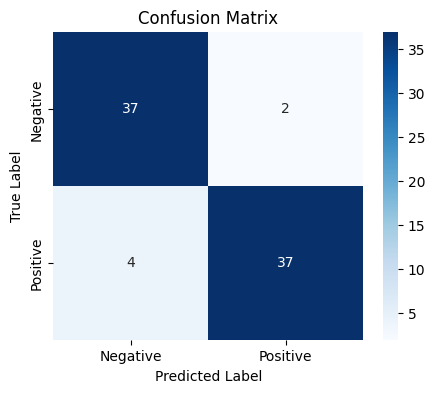

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
test_pred = model.predict(test_data)
test_pred = (test_pred > 0.5)

# Get the confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Define the class names
class_names = ['Negative', 'Positive']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

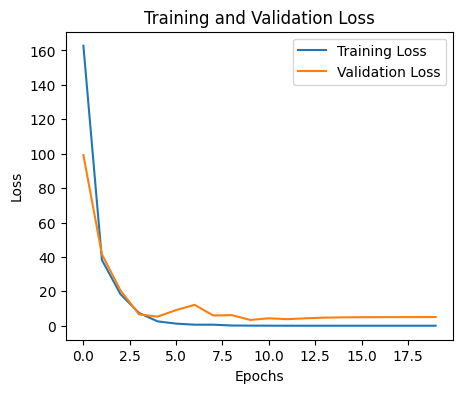

In [ ]:
# Get training and validation loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.figure(figsize=(5, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


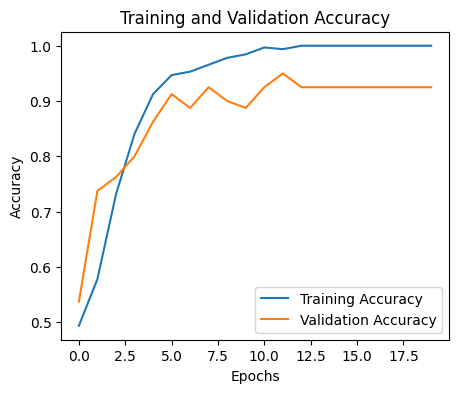

In [ ]:
# Get training and validation accuracy curves
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.figure(figsize=(5, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 32ms/step


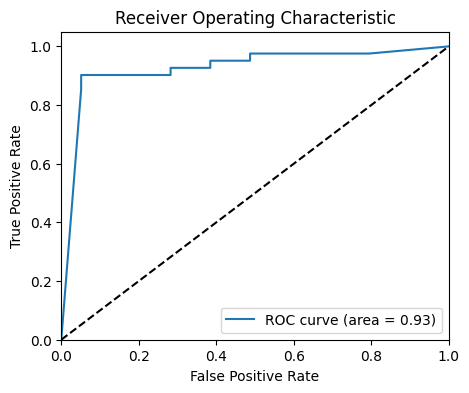

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for test data
y_pred_proba = model.predict(test_data)

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate area under curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
